In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
import cv2
import keras


In [2]:
import os
folder_path="C:\\Users\\Raju\\data set\\taining"
image_size = (180, 180)
batch_size = 128

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    folder_path,
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)


Found 1012 files belonging to 2 classes.
Using 810 files for training.
Using 202 files for validation.


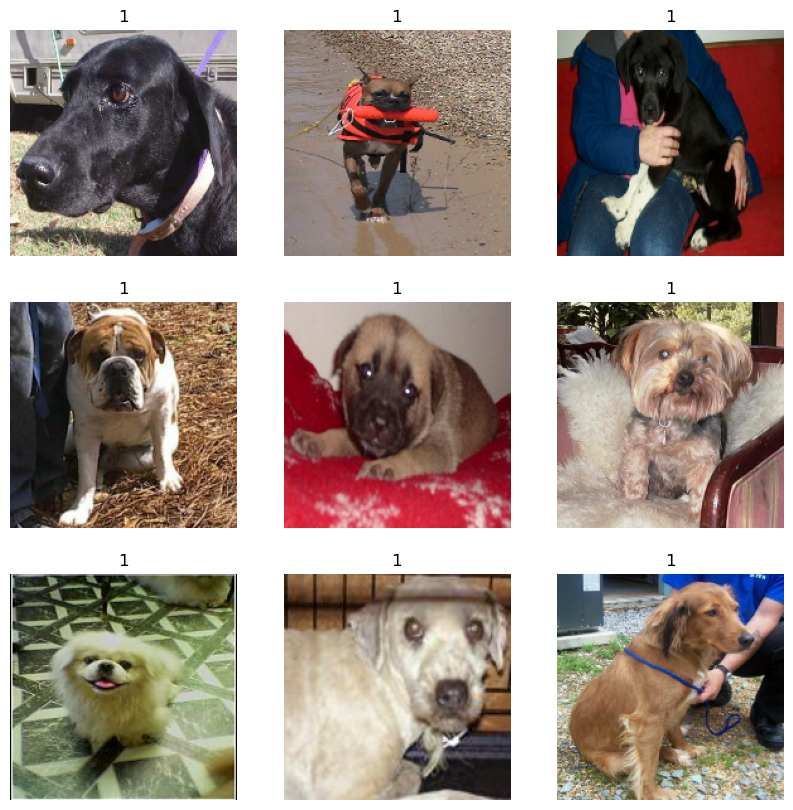

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [4]:
S=64
from keras.preprocessing.image import ImageDataGenerator
training_set="C:\\Users\\Raju\\data set\\taining"
test_set="C:\\Users\\Raju\\data set\\taining"

trainDatagen = ImageDataGenerator(
                    rescale=1./255,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True)

testDatagen = ImageDataGenerator(rescale=1./255)

trainDataset = trainDatagen.flow_from_directory(
        training_set,
        target_size=(S, S),
        batch_size=32,
        class_mode='binary')

testDataset = testDatagen.flow_from_directory(
        test_set,
        target_size=(S, S),
        batch_size=32,
        class_mode='binary')

Found 1012 images belonging to 2 classes.
Found 1012 images belonging to 2 classes.


In [5]:

classifier = Sequential()

classifier.add(Convolution2D(filters=32, kernel_size=(3,3), strides=(1,1), input_shape=(S,S,3), activation='relu', padding='same'))


classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2) ))


classifier.add(BatchNormalization())

classifier.add(Dropout(0.2))

In [6]:
classifier.add(Convolution2D(filters=16, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.2))


In [7]:
classifier.add(Convolution2D(filters=32, kernel_size=(3,3), strides=(2,2), activation='relu', padding='same'))
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.2))

In [8]:
classifier.add(Flatten())

In [9]:
classifier.add(Dense(units=32,activation='relu'))

In [10]:
classifier.add(Dense(units=1,activation='sigmoid'))
print(classifier.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 16)       0

In [11]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
mc = ModelCheckpoint('DogCatModel.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [12]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#fitting


history = classifier.fit(trainDataset,
                    steps_per_epoch=int(8000/batch_size),
                    epochs=50,
                    validation_data=testDataset,
                    validation_steps=int(2000/batch_size))

Epoch 1/50
62/62 [==============================] - 33s 415ms/step - loss: 0.1077 - accuracy: 0.9625 - val_loss: 0.3551 - val_accuracy: 1.0000


In [13]:
classifier.save('DogCatModel.h5')
history.history


{'loss': [0.10772183537483215],
 'accuracy': [0.9624505639076233],
 'val_loss': [0.3551469147205353],
 'val_accuracy': [1.0]}

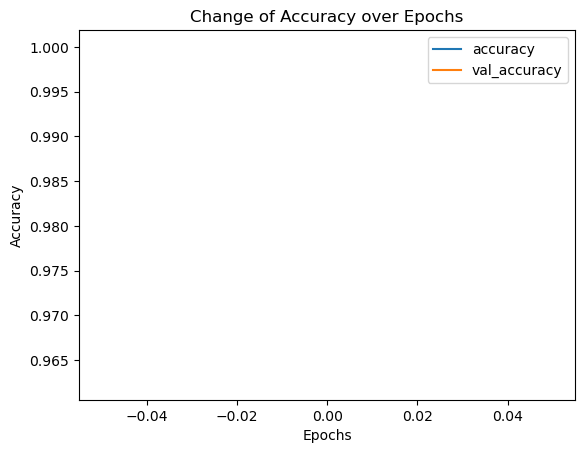

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], '')
plt.xlabel("Epochs") 
plt.ylabel('Accuracy')
plt.title('Change of Accuracy over Epochs')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

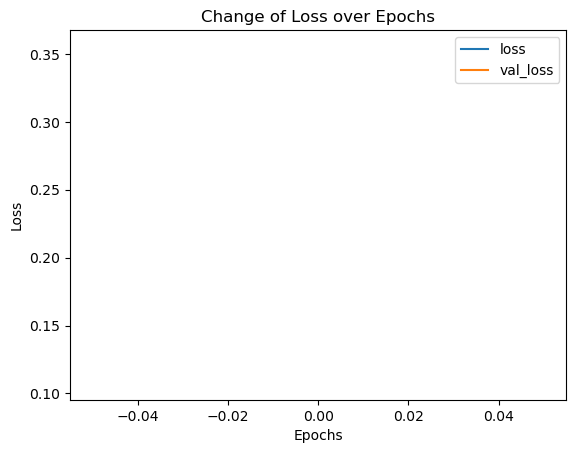

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], '')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.title('Change of Loss over Epochs')
plt.legend(['loss', 'val_loss'])
plt.show()

In [16]:
trainDataset.class_indices

{'cats': 0, 'dogs': 1}

In [17]:
print(os.path.dirname("DogCatModel.h5"))
saved_model = keras.models.load_model(r"C:\\Users\\Raju\\data set\\DogCatModel.h5")


In [18]:
test_set_cat="C:\\Users\\Raju\\data set\\training\\cats"
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
#for img in os.listdir(test_set_cat): 
 # imgCat = mpimg.imread("C:\\Users\\bjawa\\Documents\\Vino-Shastra\\DS_PT_1\\Spec-DS\\test_set\\cats\\cat.4001.jpg")
  #plt.imshow(imgCat)
  #plt.show()

imgCat = mpimg.imread("C:\\Users\\Raju\\data set\\taining\cats\\cat.4018.jpg")
plt.imshow(imgCat)
plt.show()

imgCat = cv2.resize(imgCat, (64,64))
imgCat = imgCat.reshape(1,64,64,3)

pred = classifier.predict(imgCat)
print("Probability that it is a Cat = ", "%.2f" % (1-pred))

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Raju\\data set\\taining\\cats\\cat.4018.jpg'